In [1]:
from dataset import Dataset
import pandas as pd

In [2]:
ratings_df = pd.read_csv(Dataset.get_dataset_path() + '/movielens-edu/ratings.csv')
ds = Dataset(ratings_df)
print('There are ', len(ds.movies_df), ' movies and ', len(ds.ratings_df), ' ratings')

There are  86537  movies and  1000209  ratings


In [12]:
movies = 9742
users = 610
ratings = 100836

full = movies * users
density = ratings / full
sparsity = 1 - density

density, full, sparsity


(0.016968273253211548, 5942620, 0.9830317267467884)

In [4]:
ds.movies_df.head(20)

,movieId,title,genres,avg_rating
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",NaN
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",4.146846
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",3.201141
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",3.016736
4,5,Father of the Bride Part II (1995),[Comedy],2.729412
5,6,Heat (1995),"[Action, Crime, Thriller]",3.006757
6,7,Sabrina (1995),"[Comedy, Romance]",3.878723
7,8,Tom and Huck (1995),"[Adventure, Children]",3.410480
8,9,Sudden Death (1995),[Action],3.014706
9,10,GoldenEye (1995),"[Action, Adventure, Thriller]",2.656863


In [5]:
ds.ratings_df.head(20)

,userId,movieId,rating,timestamp,datetime
0,1,1193,5,978300760,31-12-2000
1,1,661,3,978302109,31-12-2000
2,1,914,3,978301968,31-12-2000
3,1,3408,4,978300275,31-12-2000
4,1,2355,5,978824291,06-01-2001
5,1,1197,3,978302268,31-12-2000
6,1,1287,5,978302039,31-12-2000
7,1,2804,5,978300719,31-12-2000
8,1,594,4,978302268,31-12-2000
9,1,919,4,978301368,31-12-2000


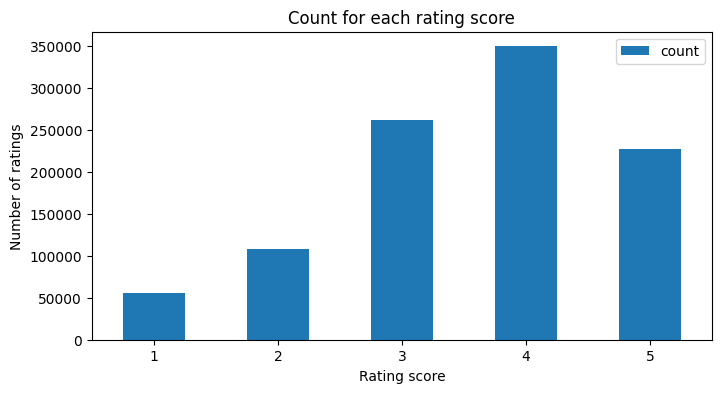

In [6]:
ax = ds.rating_count_df.reset_index().plot.bar(x='rating',y='count', figsize=(8, 4), rot=0, title='Count for each rating score', fontsize=10,
                                               xlabel="Rating score", ylabel="Number of ratings")

Mean of all ratings:  3.702704866999724


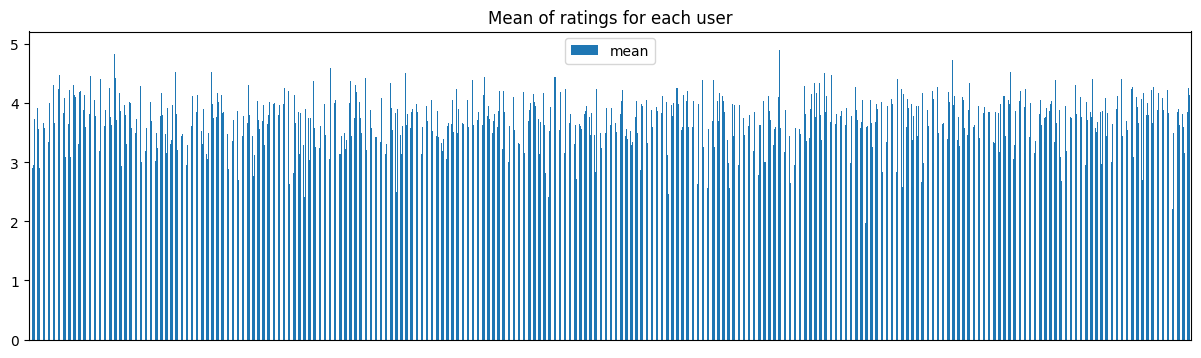

In [7]:
means = ds._user_ratings_mean
df = pd.DataFrame({'user': means.keys(), 'mean': means.values})
ax = df.plot.bar(x='user', y='mean', figsize=(15, 4), title="Mean of ratings for each user")
ax.xaxis.set_visible(False)

print('Mean of all ratings: ', means.mean())

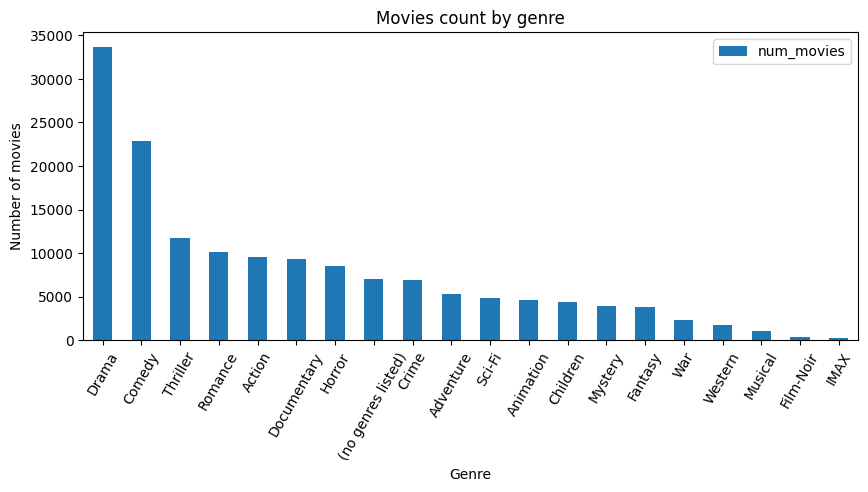

In [8]:
genre_distribution = ds.movies_df['genres'].explode().value_counts()
df = pd.DataFrame({'genre': genre_distribution.keys(), 'num_movies': genre_distribution.values})
ax = df.plot.bar(x='genre', y='num_movies', rot=60, figsize=(10, 4), title="Movies count by genre", xlabel="Genre", ylabel="Number of movies")

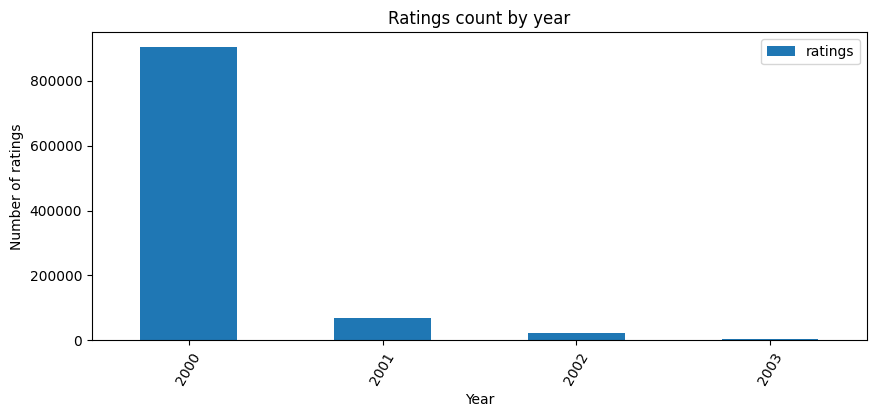

In [9]:
df = ds.ratings_df
df['year'] = pd.DatetimeIndex(df['datetime']).year
years_ratings = df['year'].explode().value_counts().sort_index()
df = pd.DataFrame({'year': years_ratings.keys(), 'ratings': years_ratings.values})
ax = df.plot.bar(x='year', y='ratings', rot=60, figsize=(10, 4), title="Ratings count by year", xlabel="Year", ylabel="Number of ratings")